In [36]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import colormaps
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager

In [2]:
base_url = 'https://understat.com/match/'

match = '21954'
url = base_url+match

In [5]:
res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts = soup.find_all('script')

In [6]:
strings = scripts[1].string

In [8]:
str_start = strings.index("('")+2
str_end = strings.index("')")
json_data = strings[str_start:str_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

In [11]:
data['a'][0]

{'id': '539885',
 'minute': '6',
 'result': 'SavedShot',
 'X': '0.879000015258789',
 'Y': '0.32799999237060545',
 'xG': '0.08462114632129669',
 'player': 'Callum Wilson',
 'h_a': 'a',
 'player_id': '468',
 'situation': 'OpenPlay',
 'season': '2023',
 'shotType': 'RightFoot',
 'match_id': '21954',
 'h_team': 'Sheffield United',
 'a_team': 'Newcastle United',
 'h_goals': '0',
 'a_goals': '8',
 'date': '2023-09-24 15:30:00',
 'player_assisted': 'Bruno Guimarães',
 'lastAction': 'Pass'}

In [51]:
from pandas import json_normalize

data_home = json_normalize(data['h'])
data_away = json_normalize(data['a'])
columns_to_convert = ['X', 'Y', 'xG', 'minute']

for col in columns_to_convert:
    data_home[col] = pd.to_numeric(data_home[col], errors='coerce')
    data_away[col] = pd.to_numeric(data_away[col], errors='coerce')


In [52]:
data_away.head(10)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,539885,6,SavedShot,0.879,0.328,0.084621,Callum Wilson,a,468,OpenPlay,2023,RightFoot,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Bruno Guimarães,Pass
1,539889,20,Goal,0.935,0.518,0.585392,Sean Longstaff,a,7078,OpenPlay,2023,LeftFoot,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Anthony Gordon,Pass
2,539892,29,MissedShots,0.849,0.518,0.056411,Miguel Almirón,a,7420,FromCorner,2023,LeftFoot,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Kieran Trippier,Pass
3,539893,30,Goal,0.967,0.447,0.452346,Dan Burn,a,7382,FromCorner,2023,Head,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Kieran Trippier,Cross
4,539894,32,SavedShot,0.863,0.425,0.379386,Callum Wilson,a,468,OpenPlay,2023,RightFoot,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Anthony Gordon,Pass
5,539895,34,Goal,0.898,0.464,0.033407,Sven Botman,a,8635,SetPiece,2023,Head,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Kieran Trippier,Aerial
6,539896,37,SavedShot,0.808,0.585,0.054487,Callum Wilson,a,468,OpenPlay,2023,RightFoot,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Bruno Guimarães,BallRecovery
7,539897,42,SavedShot,0.916,0.643,0.314062,Callum Wilson,a,468,OpenPlay,2023,LeftFoot,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Anthony Gordon,Pass
8,539898,43,MissedShots,0.802,0.524,0.031283,Anthony Gordon,a,8150,FromCorner,2023,RightFoot,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,None,None
9,539899,44,BlockedShot,0.774,0.431,0.039950,Elliot Anderson,a,9154,OpenPlay,2023,LeftFoot,21954,Sheffield United,Newcastle United,0,8,2023-09-24 15:30:00,Kieran Trippier,Pass


In [65]:
print(data_away[['X', 'Y']])

        X      Y
0   0.879  0.328
1   0.935  0.518
2   0.849  0.518
3   0.967  0.447
4   0.863  0.425
5   0.898  0.464
6   0.808  0.585
7   0.916  0.643
8   0.802  0.524
9   0.774  0.431
10  0.796  0.367
11  0.892  0.672
12  0.965  0.520
13  0.879  0.559
14  0.809  0.721
15  0.859  0.569
16  0.850  0.567
17  0.921  0.455
18  0.921  0.442
19  0.948  0.476
20  0.909  0.728
21  0.924  0.464


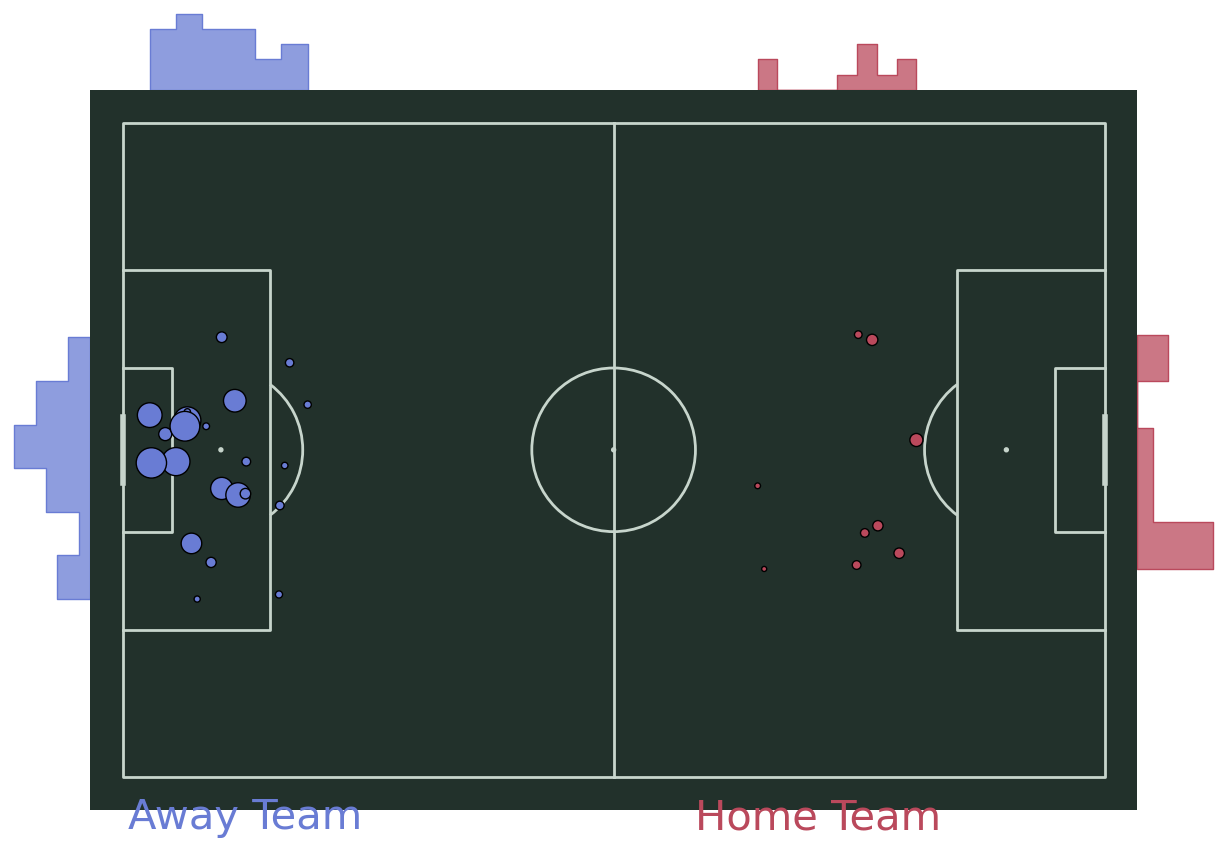

In [105]:
import seaborn as sns

PITCH_LENGTH = 100  # in meters
PITCH_WIDTH = 80    # in meters

# Create pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')

# Set up the jointgrid
fig, axs = pitch.jointgrid(figheight=10, 
                           left=None,
                           bottom=0.075,
                           marginal=0.1,
                           space=0,
                           grid_width=0.9,
                           title_height=0,
                           axis=False,
                           endnote_height=0,
                           grid_height=0.8)

# Scatter plot for shots, using xG values to scale size
sc_home = pitch.scatter(data_home['X'] * PITCH_LENGTH, data_home['Y'] * PITCH_WIDTH, 
                        s=data_home['xG'] * 700, 
                        ec='black', color='#ba495c', ax=axs['pitch'], label='Home Team')
sc_away = pitch.scatter((PITCH_LENGTH - data_away['X'] * PITCH_LENGTH), data_away['Y'] * PITCH_WIDTH, 
                        s=data_away['xG'] * 700, 
                        ec='black', color='#697cd4', ax=axs['pitch'], label='Away Team')

# Histograms for shot locations
away_hist_y = sns.histplot(y=data_away['Y'] * PITCH_WIDTH, ax=axs['left'], element='step', color='#697cd4')
home_hist_x = sns.histplot(x=data_home['X'] * PITCH_LENGTH, ax=axs['top'], element='step', color='#ba495c')
away_hist_x = sns.histplot(x=(PITCH_LENGTH - data_away['X'] * PITCH_LENGTH), ax=axs['top'], element='step', color='#697cd4')
home_hist_y = sns.histplot(y=data_home['Y'] * PITCH_WIDTH, ax=axs['right'], element='step', color='#ba495c')

# Displaying team names on the pitch
away_label_x = 15
home_label_x = PITCH_LENGTH - 15
label_y = PITCH_WIDTH + 5  # a bit above the pitch

axs['pitch'].text(x=away_label_x, y=label_y, s="Away Team", color='#697cd4', ha='center', va='center', fontsize=30)
axs['pitch'].text(x=home_label_x, y=label_y, s="Home Team", color='#ba495c', ha='center', va='center', fontsize=30)

plt.show()